 # ПРОЕКТ - РАЗВЕДОВАТЕЛЬНЫЙ АНАЛИЗ ДАННЫХ  

### Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска

Этапы работы над проектом:
- считать данные, просмотреть пропущенные значения и выбросы;
- написать функции для обработки параметров;
- визуализировать и оценить каждый параметр;
- поиск взаимосвязей между параметрами;
- корреляционный анализ;
- сделать выводы.

Цели: провести анализ параметров и сделать выводы о влиянии параметров на результаты по математике.

Задачи проекта: обработать пропущенные значения, посмотреть на взаимосвязь критериев, визуализировать параметры, оценить их степень влияния

## 1. Первичный осмотр данных

In [604]:
# Импортируем сразу все необходимые библиотеки и загружаем данные

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import matplotlib
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [742]:
stud_math = pd.read_csv('stud_math.xls')
stud_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов

In [743]:
display(stud_math.head(10))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

У нас 30 столбцов и 395 строк. Есть лишний столбец studytime, granular, посмотрим , что за данные в нем 

In [724]:
stud_math['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

Посмотрим на корреляцию этого столбца

In [725]:
stud_math.corr()['studytime, granular'].sort_values()

studytime             -1.000000
score                 -0.115741
Medu                  -0.078589
Fedu                  -0.057199
famrel                -0.045894
age                    0.015556
absences               0.026544
goout                  0.051280
health                 0.080016
traveltime             0.102206
freetime               0.121969
failures               0.178992
studytime, granular    1.000000
Name: studytime, granular, dtype: float64

Этот столбец полностью коррелирует со столбцом studytime, удалим его:

In [726]:
stud_math.drop(['studytime, granular'], inplace=True, axis=1)

Посмотрим на количество пропущенных значений

In [727]:
stud_math.isnull().sum()

school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64

Только первые три столбца заполнены полностью, остальные содержат пропуски.

## 2. Подготовка 

Все данные можно разделить на группы: содержащие числовые значения, категориальные и бинарные (два варианта значений)

In [611]:
numerical_columns = ['age', 'absences','score']
binary_columns = ['school','sex','address', 'famsize', 'Pstatus', 'schoolsup', 'famsup','paid', 'activities', 'nursery',
                 'higher', 'internet', 'romantic']
categorial_columns = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures',
                     'famrel', 'freetime', 'goout', 'health']

In [612]:
pd.DataFrame(stud_math.school.value_counts())

,school
GP,349
MS,46


In [613]:
# Функция описывает числовую переменную

def numeric_view(col):
    print(stud_math[col].describe())
    a = stud_math[col].isnull().sum()
    print(f'Количество незаполненных строк: {a}')
          

In [614]:
# Функция визуализирует числовую переменную и ее зависимость от оценки по математике (score)

def graf_num(col):
    fig, axes = plt.subplots(1,2, figsize=(12,4))
    axes[0].hist(stud_math[col], bins = 50)
    axes[0].set_title(f'Гистограмма {col}')
    axes[0].set_xlabel(f'Значения {col}')
    axes[0].set_ylabel(f'Количество значений')
    
    axes[1].scatter(x = stud_math[col], y = stud_math['score'])
    axes[1].set_title(f'Зависимость баллов от  {col}')
    axes[1].set_xlabel(f'Значения {col}')
    axes[1].set_ylabel(f'Баллы')   

In [615]:
# Функция описывает категориальную переменную и ее зависимость от оценки по математике (score)

def categorian_view(col):
    a = stud_math[col].isnull().sum()
    
    print(f'Количество незаполненных строк: {a}')
    print(f'Количество уникальных значений: {stud_math[col].nunique()}')
    print(stud_math[col].describe())
    print(f'Распределение признака в %')
    print(pd.DataFrame(stud_math[col].value_counts(1)))
    print('Среднее занчение баллов по наблюдениям ')
    print(stud_math.groupby(col)['score'].mean())
    

In [616]:
# Функция визуализирует категораильную переменную и ее зависимость от оценки по математике (score)

def graf_cat(col):
    fig, axes = plt.subplots(1,3, figsize = (12,4))
    
    axes[0].hist(stud_math[col])
    axes[0].set_title(f'Гистограмма {col}')
    axes[0].set_xlabel(f'Значения {col}')
    axes[0].set_ylabel(f'Количество значений')
    
    axes[1].scatter(x = stud_math[col], y = stud_math['score'])
    axes[1].set_title(f'Зависимость баллов от  {col}')
    axes[1].set_xlabel(f'Значения {col}')
    axes[1].set_ylabel(f'Баллы') 
    
    sns.boxplot(x = col, y = 'score', data = stud_math, ax=axes[2])
    axes[2].set_title(f'Зависимость баллов от  {col}')
    axes[2].set_xlabel(f'Значения {col}')
    axes[2].set_ylabel(f'Баллы') 
    
    plt.show()

In [617]:
# Функция проверяет наличие выбросов через межквартильный размах

def outliers(column):
    q1 = stud_math[column].quantile(0.25, interpolation='midpoint')
    q2 = stud_math[column].quantile(0.75, interpolation='midpoint')
    IQR = q2 - q1
    limit1 = q1 - 1.5*IQR
    limit2 = q2 + 1.5*IQR
    if stud_math[column].min() < limit1:
        print(f'Распределение содежрит выбросы ниже {limit1}')
    elif stud_math[column].max() > limit2:
        print(f'Распределение содежрит выбросы выше {limit2}')
    else:
        print(f'Выбросов нет')
        
    return

In [618]:
# Функция заменяет пропуски на моду

def replace_mode(col):
    stud_math.loc[:, col] = stud_math.loc[:, col].astype(str).apply(lambda x: None if x.strip() == '' else x)
    mode_col = stud_math.loc[:, col].mode()
    stud_math.loc[:, col] = stud_math.loc[:, col].apply(lambda x: x.replace('nan', mode_col[0]))

# 3. Анализ числовых переменных

Сначала посмотрим на распределение числовых признаков и так как основной показатель это оценки по математике за госэкзамен, с него и стоит начать

## score

In [631]:
numeric_view('score')

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
Количество незаполненных строк: 0


Максимальное количество - 100, минимаальное - 0. Есть пропущенные значения - 6. Скорее всего учеников оценивали по 100-бальной шкале. Посмотрим на незаполненные строки:

In [634]:
stud_math[stud_math.score.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
201,GP,F,16,U,GT3,T,2.0,3.0,other,other,reputation,mother,1.0,2.0,0.0,yes,yes,NaN,yes,yes,-6.0,yes,no,no,4.0,NaN,3.0,4.0,6.0,NaN
244,GP,F,18,U,GT3,T,2.0,1.0,other,other,course,other,2.0,3.0,0.0,no,yes,yes,no,no,-9.0,yes,yes,yes,4.0,4.0,4.0,3.0,0.0,NaN
270,GP,F,19,NaN,GT3,T,3.0,3.0,other,services,home,other,1.0,2.0,2.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,3.0,5.0,5.0,NaN,NaN
283,GP,F,18,U,GT3,T,1.0,1.0,other,other,home,mother,2.0,2.0,0.0,yes,NaN,no,yes,yes,-6.0,yes,yes,no,5.0,NaN,4.0,4.0,4.0,NaN
312,GP,M,19,U,GT3,T,1.0,2.0,other,services,course,other,1.0,2.0,1.0,no,no,no,no,no,-6.0,yes,yes,no,4.0,5.0,NaN,4.0,3.0,NaN
350,MS,M,19,NaN,GT3,T,1.0,1.0,other,services,home,other,3.0,2.0,3.0,no,no,no,no,NaN,-6.0,yes,yes,no,5.0,4.0,4.0,2.0,8.0,NaN


Эти ученики возможно не явились на экзамен, какой то видимой зависимости между ними нет - разного пола и возраста. Так как нужно оценить влияние признаков на оценку по математике, а у данных учеников ее нет, значит целесообразно удалить этих учеников из датафрейма, чтобы не влияли на остальные распределения признаков.

In [635]:
stud_math.drop(stud_math[stud_math.score.isna()].index, inplace = True)

Text(0, 0.5, 'количество значений')

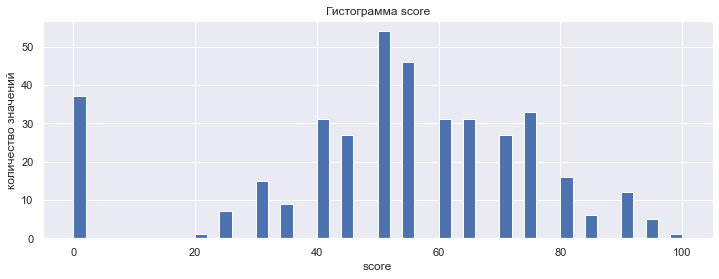

In [636]:
fig, axes = plt.subplots(1,1, figsize = (12,4))

axes.hist(stud_math['score'], bins=50)
axes.set_title('Гистограмма score')
axes.set_xlabel('score')
axes.set_ylabel('количество значений')

Распределение оценок по математике смещено вправо с максимальным занчением около 50. Есть оценки 0, возможно ученики не выполняли задание или невыполняли в принципе. Также нет значений до 20 баллов, можно сделать вывод, что все ученики, которые выполняли задания набрали больше 20 баллов, то есть выполнили более 20% заданий. Отбрасывать учеников, которые набрали 0 баллов, а их примерно 37-38 нет оснований.  

# age

Посмотрим на распределение возрастов студентов

In [637]:
numeric_view('age')

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
Количество незаполненных строк: 0


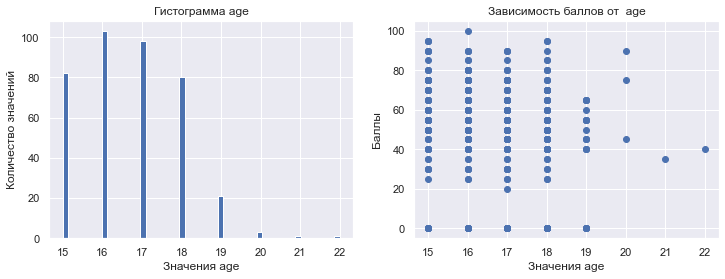

In [638]:
graf_num('age')

Студентов в возрасте от 20 до 22 буквально 5 человек, по какой-то причине они поздно заканчивают школу, но экзамен сдали. студенты с оценкой 0 есть во всех возрастах до 19 лет. Оценим среднее значение набранных баллов в зависимости от возраста:

In [639]:
stud_math.groupby('age')['score'].mean()

age
15    56.280488
16    55.194175
17    51.377551
18    48.312500
19    40.238095
20    70.000000
21    35.000000
22    40.000000
Name: score, dtype: float64

Есть тренд на снижение средней оценки с возрастом от 15 до 19 лет, занчения от 20 скорее исключения из правил, так как это всего 5 исключительных учащихся.

# absences
#### количество пропущенных занятий

In [640]:
numeric_view('absences')

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
Количество незаполненных строк: 11


C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


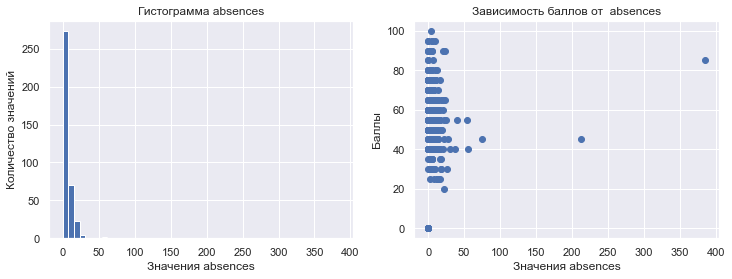

In [641]:
graf_num('absences')

Большиснство учащихся пропускали занятия меньше 8 раз (75% наблюдений). В распределении наблюдений есть выбросы и есть незаполненные значения - 11. При этом ученики, которые много пропускали, госэкзамен сдали и получили оценки выше 20 баллов. Возможно эти ученики учились на дому. Также есть ученики, которые не пропускали занятия, но набрали 0 баллов.

In [642]:
outliers('absences')

Распределение содежрит выбросы выше 20.0


Посмотрим детальнее на наблюдения свыше 20

In [643]:
stud_math[stud_math.absences > 20].absences.value_counts()

22.0     3
212.0    1
23.0     1
40.0     1
38.0     1
30.0     1
75.0     1
21.0     1
385.0    1
28.0     1
24.0     1
56.0     1
26.0     1
54.0     1
25.0     1
Name: absences, dtype: int64

Выбросов довольно много и исключать их из выборки нельзя, так как эти ученики несмотря на пропуски получили баллы за госэкзамен, для анализа можно фильтровать до 50 условно , чтобы захватить максимальное количство значений.

Посмотрим есть ли зависимость между количесвом пропусков занятий и количеством баллов за экзамен

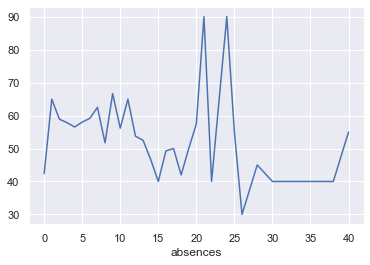

In [644]:

stud_math[stud_math.absences < 50].groupby('absences')['score'].mean().plot()

Заметно общее снижение средних баллов с увеличением количество пропусков занятий, но есть и те, которые проспускали занятия в примерно 20-25 раз и набрали высокий балл за экзамен. В целом, исключая выбросы, можно сказать, что с увеличением количества пропусков занятий средний балл за экзамен снижается.

# 4. Анализ номинативных переменных

# school
#### абрвиатура школы

In [645]:
categorian_view('school')

Количество незаполненных строк: 0
Количество уникальных значений: 2
count     389
unique      2
top        GP
freq      344
Name: school, dtype: object
Распределение признака в %
      school
GP  0.884319
MS  0.115681
Среднее занчение баллов по наблюдениям 
school
GP    52.630814
MS    49.444444
Name: score, dtype: float64


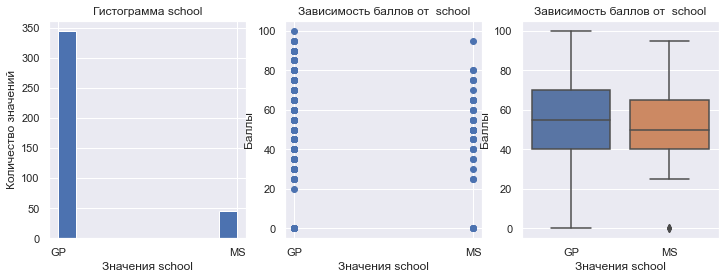

In [646]:
graf_cat('school')

Большиснтво учеников учатся в школе GP, их средний бал немного выше, чем учеников школы MS. Возможно это связано с тем, что количесвтво налблюдений в первой школе намного выше, чем во второй. Но максимальные значения баллов набрали ученики из школы GP. В обеих школах есть ученики, набравшие 0 баллов. 

# sex
#### пол ученика

In [647]:
categorian_view('sex')

Количество незаполненных строк: 0
Количество уникальных значений: 2
count     389
unique      2
top         F
freq      204
Name: sex, dtype: object
Распределение признака в %
        sex
F  0.524422
M  0.475578
Среднее занчение баллов по наблюдениям 
sex
F    50.098039
M    54.648649
Name: score, dtype: float64


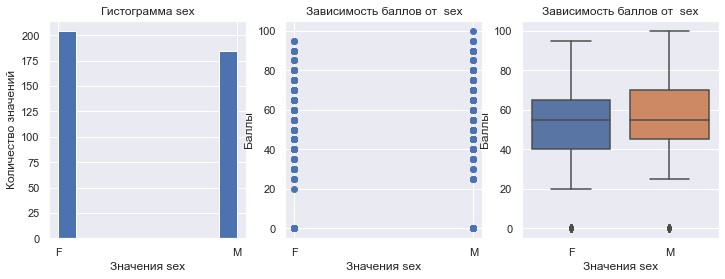

In [648]:
graf_cat('sex')

Девочек больше, чем мальчиков. В целом распределение довольно равномерное, мальчики набрали набрали выше баллы по экзамену. Среди мальчиков и девочек также есть и такие, котрые набрали 0 баллов.

# address

тип адреса ученика ('U' - городской, 'R' - за городом)

In [649]:
categorian_view('address')

Количество незаполненных строк: 15
Количество уникальных значений: 2
count     374
unique      2
top         U
freq      291
Name: address, dtype: object
Распределение признака в %
    address
U  0.778075
R  0.221925
Среднее занчение баллов по наблюдениям 
address
R    46.927711
U    53.573883
Name: score, dtype: float64


Большинство учащикся живут в городе. Посмотрим на незаполненные строки:

In [650]:
stud_math[stud_math.address.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
52,GP,M,15,NaN,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
75,GP,M,15,NaN,GT3,T,4.0,3.0,teacher,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,NaN,NaN,3.0,3.0,5.0,6.0,50.0
92,GP,F,16,NaN,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
96,GP,M,16,NaN,GT3,NaN,4.0,3.0,services,other,reputation,mother,2.0,1.0,0.0,yes,yes,NaN,yes,no,-3.0,NaN,yes,no,3.0,3.0,3.0,4.0,2.0,75.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
168,GP,F,16,NaN,GT3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,no,-6.0,yes,yes,no,5.0,1.0,5.0,4.0,0.0,0.0
241,GP,M,17,NaN,LE3,A,4.0,4.0,teacher,other,course,mother,NaN,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,3.0,3.0,NaN,4.0,2.0,60.0
254,GP,M,17,NaN,NaN,T,2.0,1.0,other,other,course,mother,1.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,2.0,5.0,NaN,60.0
292,GP,F,18,NaN,LE3,T,2.0,1.0,services,at_home,reputation,mother,1.0,2.0,1.0,no,NaN,no,no,yes,-6.0,yes,yes,yes,5.0,4.0,3.0,5.0,12.0,65.0


Нет никаких зависимостей. Заменим пропуски на моду

In [651]:
replace_mode('address')

Посмотрим как соотносится проживание в городе и загородом в зависимости от времени на дорогу:

In [652]:
stud_math.groupby('traveltime')['address'].value_counts()

traveltime  address
1.0         U          205
            R           34
2.0         U           68
            R           26
3.0         R           12
            U            9
4.0         R            4
            U            3
Name: address, dtype: int64

Большинство учащихся живут в городе, но в каждой группе удаленности от школы есть и городские и загородные.
Заменим пропуски на моду

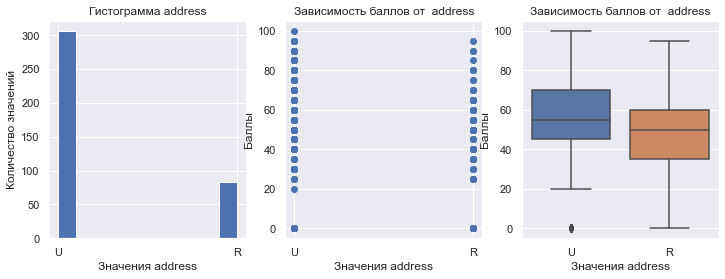

In [653]:
stud_math.address = stud_math.address.astype(str)
graf_cat('address')

В целом распределение равномерное и можно сказать , что показатель успеваемости по математике не зависит от того, где живет ученик

# famsize
#### размер семьи('LE3' <= 3, 'GT3' >3)

In [654]:
categorian_view('famsize')

Количество незаполненных строк: 27
Количество уникальных значений: 2
count     362
unique      2
top       GT3
freq      255
Name: famsize, dtype: object
Распределение признака в %
     famsize
GT3  0.70442
LE3  0.29558
Среднее занчение баллов по наблюдениям 
famsize
GT3    51.509804
LE3    54.672897
Name: score, dtype: float64


71% семей учащихся имеют более трех членов семьи. Скорее всего это семьи, где более 1 ребенка. 

In [655]:
stud_math[stud_math.famsize.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0
32,GP,M,15,R,NaN,T,4.0,3.0,teacher,at_home,course,mother,1.0,2.0,0.0,no,yes,no,yes,NaN,-6.0,yes,yes,yes,4.0,NaN,2.0,5.0,0.0,80.0
36,GP,M,15,U,NaN,T,4.0,3.0,teacher,services,home,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,4.0,3.0,4.0,2.0,90.0
76,GP,M,15,U,NaN,T,4.0,0.0,teacher,other,course,mother,2.0,4.0,0.0,no,no,no,yes,yes,-12.0,NaN,yes,no,3.0,4.0,3.0,1.0,8.0,50.0
78,GP,M,17,U,NaN,T,2.0,1.0,other,other,home,mother,2.0,1.0,3.0,yes,NaN,no,yes,yes,-3.0,no,yes,no,4.0,5.0,1.0,3.0,2.0,50.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,-6.0,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
114,GP,M,15,R,NaN,T,2.0,1.0,health,services,reputation,mother,1.0,2.0,NaN,no,no,no,yes,yes,-6.0,yes,yes,yes,5.0,4.0,2.0,5.0,8.0,45.0
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
129,GP,M,16,R,NaN,T,4.0,4.0,teacher,teacher,course,mother,1.0,NaN,0.0,no,no,yes,yes,yes,NaN,yes,yes,no,3.0,5.0,5.0,4.0,NaN,90.0


Заменим на моду

In [656]:
replace_mode('famsize')

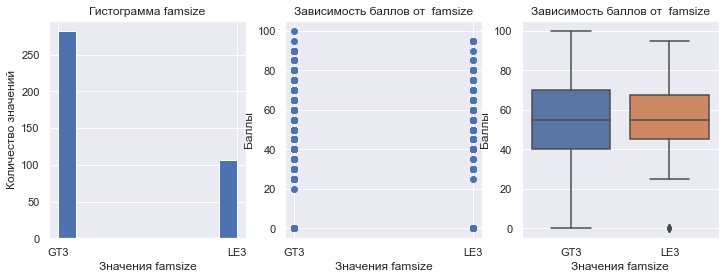

In [657]:
stud_math.famsize = stud_math.famsize.astype(str)
graf_cat('famsize')

Распределение баллов в зависимости от размера семьи равномерное.

# Pstatus
#### статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [658]:
categorian_view('Pstatus')

Количество незаполненных строк: 45
Количество уникальных значений: 2
count     344
unique      2
top         T
freq      308
Name: Pstatus, dtype: object
Распределение признака в %
    Pstatus
T  0.895349
A  0.104651
Среднее занчение баллов по наблюдениям 
Pstatus
A    55.138889
T    51.704545
Name: score, dtype: float64


90% учеников живут в полных семьях, где двое родителей. 

Можно посмотреть на зависимость статуса семьи, проживания и занятости родителей

In [659]:
stud_math.groupby('Pstatus').address.value_counts(1)

Pstatus  address
A        U          0.861111
         R          0.138889
T        U          0.769481
         R          0.230519
Name: address, dtype: float64

In [660]:
stud_math.groupby('Pstatus').Mjob.value_counts(1)

Pstatus  Mjob    
A        other       0.400000
         services    0.285714
         teacher     0.142857
         at_home     0.085714
         health      0.085714
T        other       0.342373
         services    0.240678
         at_home     0.166102
         teacher     0.155932
         health      0.094915
Name: Mjob, dtype: float64

In [661]:
stud_math.groupby('Pstatus').Fjob.value_counts(1)

Pstatus  Fjob    
A        other       0.515152
         services    0.212121
         teacher     0.151515
         at_home     0.060606
         health      0.060606
T        other       0.530686
         services    0.299639
         teacher     0.079422
         at_home     0.046931
         health      0.043321
Name: Fjob, dtype: float64

Зависмостей нет, не зависмо от статуса проживания, часть родителей не работает(и матери и отцы). Незаполненные строки можно заменить на моду

In [662]:
replace_mode('Pstatus')

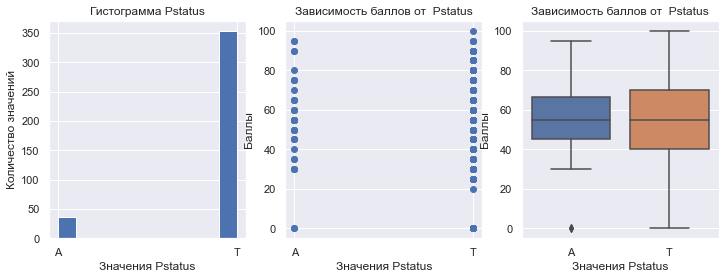

In [663]:
stud_math.Pstatus = stud_math.Pstatus.astype(str)
graf_cat('Pstatus')

Распределение баллов не завсит от статуса проживания родителей

## Далее информация об образовании родителей и их занятости, поэтому попытаемся сгруппировать эти данные и посмотреть на взаимосвязи 

# Medu и Mjob
#### Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#### Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [664]:
categorian_view('Medu')

Количество незаполненных строк: 3
Количество уникальных значений: 5
count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64
Распределение признака в %
         Medu
4.0  0.339378
2.0  0.259067
3.0  0.248705
1.0  0.145078
0.0  0.007772
Среднее занчение баллов по наблюдениям 
Medu
0.0    65.000000
1.0    43.125000
2.0    49.600000
3.0    51.822917
4.0    58.816794
Name: score, dtype: float64


В целом меньше всего мам, имеющих 1-4 класса образования. Посмотрим на зависимсоть образования от занятости 

In [665]:
categorian_view('Mjob')

Количество незаполненных строк: 19
Количество уникальных значений: 5
count       370
unique        5
top       other
freq        127
Name: Mjob, dtype: object
Распределение признака в %
              Mjob
other     0.343243
services  0.264865
at_home   0.156757
teacher   0.148649
health    0.086486
Среднее занчение баллов по наблюдениям 
Mjob
at_home     45.689655
health      60.625000
other       49.527559
services    54.744898
teacher     55.181818
Name: score, dtype: float64


In [666]:
stud_math.groupby('Mjob').Medu.value_counts()

Mjob      Medu
at_home   1.0     25
          2.0     21
          3.0      8
          0.0      2
          4.0      2
health    4.0     24
          3.0      5
          2.0      2
          1.0      1
other     2.0     43
          3.0     36
          1.0     23
          4.0     22
          0.0      1
services  3.0     38
          2.0     30
          4.0     24
          1.0      5
teacher   4.0     52
          3.0      3
Name: Medu, dtype: int64

Чаще всего не работаю мамы, имеющие 1-4 и 5-9 классов образования. 
Посмотрим на незаполненные строки

In [667]:
stud_math[stud_math.Mjob.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
29,GP,M,16,U,GT3,T,4.0,4.0,NaN,teacher,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,yes,4.0,4.0,5.0,5.0,16.0,55.0
54,GP,F,15,U,LE3,T,3.0,3.0,NaN,other,other,mother,1.0,1.0,NaN,no,no,yes,NaN,yes,-3.0,yes,yes,NaN,5.0,3.0,4.0,1.0,6.0,65.0
59,GP,F,16,U,GT3,T,4.0,2.0,NaN,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
88,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,reputation,father,2.0,2.0,1.0,no,no,yes,yes,NaN,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,12.0,50.0
104,GP,M,15,U,GT3,A,3.0,4.0,NaN,other,course,mother,NaN,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,5.0,4.0,4.0,1.0,0.0,90.0
128,GP,M,18,R,GT3,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
145,GP,F,15,U,GT3,T,1.0,1.0,NaN,services,course,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,4.0,4.0,2.0,NaN,0.0,55.0
156,GP,M,17,R,LE3,T,1.0,2.0,NaN,other,reputation,mother,1.0,1.0,0.0,no,no,no,no,yes,-3.0,yes,no,no,2.0,2.0,2.0,5.0,8.0,65.0
166,GP,M,16,U,GT3,T,2.0,2.0,NaN,other,course,father,1.0,2.0,0.0,no,no,no,no,yes,-6.0,no,yes,no,4.0,3.0,5.0,4.0,4.0,50.0
174,GP,F,16,U,LE3,T,3.0,3.0,NaN,other,reputation,mother,2.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,4.0,4.0,5.0,4.0,4.0,45.0


In [668]:
stud_math[stud_math.Medu.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
92,GP,F,16,U,LE3,T,NaN,1.0,other,other,home,father,1.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,3.0,3.0,NaN,2.0,4.0,30.0
193,GP,M,16,R,GT3,T,NaN,3.0,services,services,reputation,mother,1.0,1.0,0.0,no,yes,no,yes,yes,-3.0,yes,yes,no,4.0,3.0,2.0,5.0,8.0,50.0
239,GP,M,18,U,GT3,T,NaN,2.0,other,services,reputation,father,1.0,2.0,1.0,no,no,no,no,yes,-6.0,no,NaN,NaN,5.0,5.0,4.0,2.0,0.0,0.0


Заменим пропуски на моду

In [669]:
replace_mode('Medu')

In [670]:
replace_mode('Mjob')

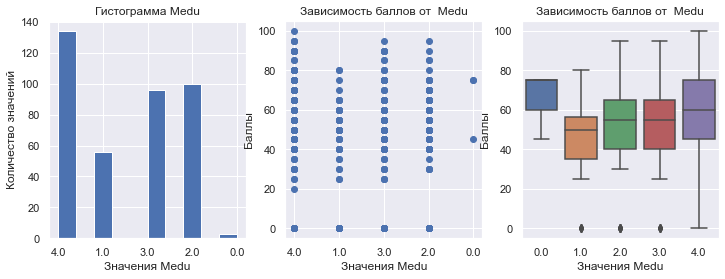

In [671]:
graf_cat('Medu')

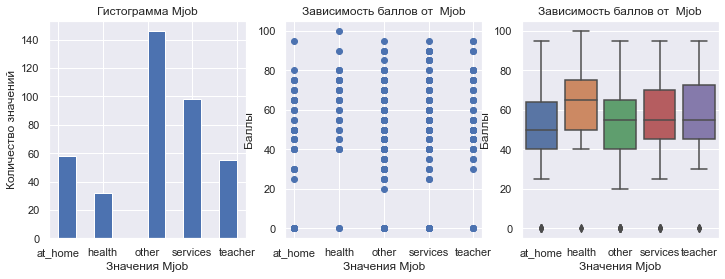

In [672]:
stud_math.Mjob = stud_math.Mjob.astype(str)
graf_cat('Mjob')

Явнных зависимостей набранных баллов от занятости и образования матери не выявлено, больше всего мам работающих в других сферах, данных о которых нет. Ученики мам, работающих в сфере здравоохранения, набрали высший балл.

# Fedu и Fjob
#### Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
#### Mjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [744]:
categorian_view('Fedu')

Количество незаполненных строк: 24
Количество уникальных значений: 6
count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64
Распределение признака в %
          Fedu
2.0   0.285714
3.0   0.258760
4.0   0.237197
1.0   0.210243
0.0   0.005391
40.0  0.002695
Среднее занчение баллов по наблюдениям 
Fedu
0.0     65.000000
1.0     46.333333
2.0     51.761905
3.0     54.042553
4.0     55.681818
40.0    60.000000
Name: score, dtype: float64


максимальное значение 40, ошибка заполнения скорее всего, в задании указано, что должны быть данные от 1 до 4. Нужно заменить данные в этой ячейке на предполагаемую 4.

In [745]:
stud_math['Fedu'].unique()

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [746]:
stud_math.loc[stud_math['Fedu'] == 40].replace(40, 4)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,4.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [732]:
categorian_view('Fjob')

Количество незаполненных строк: 36
Количество уникальных значений: 5
count       359
unique        5
top       other
freq        197
Name: Fjob, dtype: object
Распределение признака в %
              Fjob
other     0.548747
services  0.284123
teacher   0.080780
at_home   0.044568
health    0.041783
Среднее занчение баллов по наблюдениям 
Fjob
at_home     51.875000
health      55.666667
other       51.417526
services    50.454545
teacher     59.827586
Name: score, dtype: float64


In [747]:
stud_math.groupby('Fjob').Fedu.value_counts()

Fjob      Fedu
at_home   2.0      6
          1.0      3
          3.0      3
          4.0      2
health    4.0      8
          3.0      3
          1.0      1
          2.0      1
other     2.0     58
          3.0     51
          1.0     48
          4.0     30
          0.0      2
          40.0     1
services  3.0     31
          2.0     27
          1.0     19
          4.0     17
teacher   4.0     25
          3.0      1
Name: Fedu, dtype: int64

Неработающих пап, меньше чем мам. Также Больше всего занятых в других сферах и на госслужбе

In [733]:
stud_math[stud_math.Fedu.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
21,GP,M,15,U,GT3,T,4.0,NaN,health,health,other,father,1.0,1.0,NaN,no,yes,NaN,no,yes,yes,yes,no,5.0,4.0,2.0,5.0,0.0,75.0
42,GP,M,15,U,GT3,T,4.0,NaN,services,teacher,course,father,1.0,2.0,0.0,no,yes,no,yes,yes,yes,yes,no,4.0,3.0,3.0,5.0,2.0,90.0
46,GP,F,16,U,LE3,A,3.0,NaN,other,services,home,mother,1.0,2.0,0.0,no,yes,no,no,yes,yes,yes,no,2.0,3.0,5.0,3.0,12.0,55.0
57,GP,M,15,U,GT3,T,4.0,NaN,teacher,health,reputation,mother,1.0,2.0,0.0,no,yes,NaN,yes,yes,yes,no,no,3.0,2.0,2.0,5.0,4.0,75.0
58,GP,M,15,U,LE3,T,1.0,NaN,other,at_home,home,father,1.0,2.0,0.0,yes,yes,no,yes,yes,yes,yes,no,4.0,3.0,2.0,5.0,2.0,45.0
67,GP,F,16,U,GT3,NaN,3.0,NaN,services,other,course,mother,1.0,4.0,0.0,yes,yes,yes,no,yes,yes,yes,NaN,4.0,3.0,3.0,5.0,4.0,30.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
142,GP,F,15,U,GT3,T,4.0,NaN,teacher,services,course,mother,NaN,3.0,0.0,no,yes,yes,yes,yes,NaN,yes,no,4.0,2.0,2.0,5.0,2.0,55.0
159,GP,M,16,NaN,GT3,T,3.0,NaN,other,services,course,father,1.0,2.0,1.0,no,yes,yes,no,yes,yes,yes,yes,4.0,5.0,5.0,5.0,4.0,60.0
161,GP,M,15,R,GT3,T,3.0,NaN,other,NaN,course,mother,2.0,2.0,2.0,yes,yes,no,no,yes,yes,yes,yes,4.0,4.0,4.0,3.0,6.0,35.0


In [677]:
stud_math[stud_math.Fjob.isnull()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
17,GP,F,16,U,GT3,T,3.0,3.0,other,NaN,reputation,mother,3.0,NaN,0.0,yes,NaN,no,yes,yes,NaN,yes,no,no,5.0,3.0,2.0,4.0,4.0,50.0
22,GP,M,16,U,LE3,T,4.0,2.0,teacher,NaN,course,mother,1.0,2.0,0.0,no,NaN,no,yes,NaN,-6.0,yes,yes,no,4.0,5.0,1.0,5.0,2.0,80.0
26,GP,M,15,U,GT3,T,2.0,2.0,other,NaN,home,mother,NaN,1.0,0.0,no,yes,NaN,no,yes,-3.0,yes,yes,NaN,4.0,2.0,2.0,5.0,2.0,55.0
31,GP,M,15,U,GT3,T,4.0,4.0,services,NaN,reputation,mother,2.0,2.0,0.0,no,yes,NaN,yes,yes,-6.0,yes,yes,no,4.0,3.0,1.0,5.0,0.0,85.0
44,GP,F,16,U,LE3,T,2.0,2.0,other,NaN,course,father,2.0,2.0,1.0,yes,no,no,NaN,yes,-6.0,yes,yes,no,4.0,3.0,3.0,5.0,14.0,45.0
47,GP,M,16,U,GT3,T,4.0,3.0,health,NaN,reputation,mother,1.0,4.0,0.0,no,no,no,yes,yes,-12.0,yes,yes,no,4.0,2.0,2.0,2.0,4.0,100.0
52,GP,M,15,U,LE3,A,4.0,2.0,health,NaN,other,father,2.0,1.0,1.0,no,NaN,no,no,yes,-3.0,yes,NaN,no,5.0,5.0,5.0,5.0,6.0,50.0
59,GP,F,16,U,GT3,T,4.0,2.0,other,NaN,course,mother,NaN,2.0,0.0,no,NaN,no,no,yes,-6.0,yes,yes,no,4.0,2.0,3.0,5.0,2.0,80.0
68,GP,F,15,R,LE3,T,2.0,2.0,health,NaN,reputation,mother,NaN,2.0,NaN,yes,yes,NaN,no,yes,-6.0,yes,yes,no,4.0,1.0,3.0,4.0,2.0,40.0


Большое количество незаполненных строк , заменим их на моду

In [734]:
replace_mode('Fedu')

In [735]:
replace_mode('Fjob')

C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


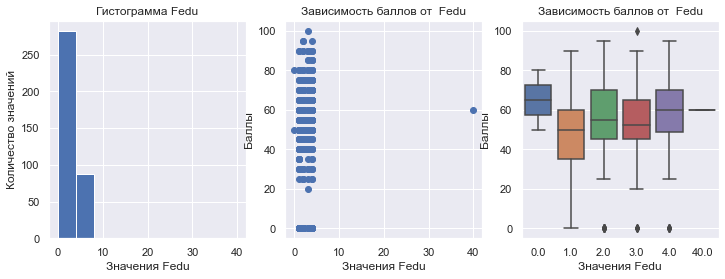

In [748]:
graf_cat('Fedu')

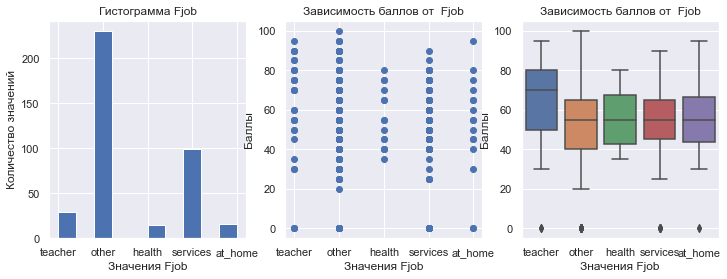

In [681]:
stud_math.Fjob = stud_math.Fjob.astype(str)
graf_cat('Fjob')

Ученики пап-учителей набрали в среднем выше баллы по математике 

# образовательная поддержка 

# paid — дополнительные платные занятия по математике (yes или no)
#### Посмотрим отдельно на эту колонку, предположительно дополнительные задания по математике требуются остающим ученикам, которые без них не смогут сдать экзамен, и тем кто хочет углубленно изучать математику.

In [682]:
categorian_view('paid')

Количество незаполненных строк: 39
Количество уникальных значений: 2
count     350
unique      2
top        no
freq      197
Name: paid, dtype: object
Распределение признака в %
         paid
no   0.562857
yes  0.437143
Среднее занчение баллов по наблюдениям 
paid
no     50.35533
yes    55.00000
Name: score, dtype: float64


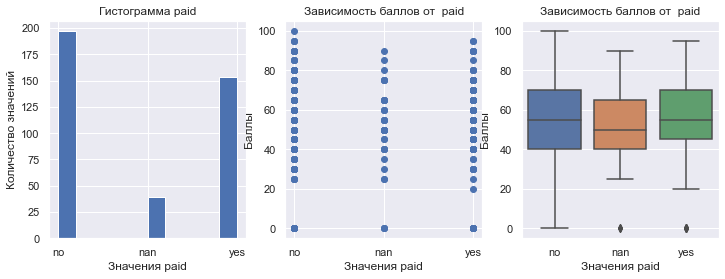

In [683]:
stud_math.paid = stud_math.paid.astype(str)
graf_cat('paid')

В целом, практически половина учеников посещала дополнительные занятия по математике 44%, много не заполненных строк и заменять их модой не следует, потому что перевес в сторону не помосещающих занятия только увеличится, тем самым наведет на непраильные выводы. Средний балл среди учеников, которые посещали дополнительные занятия немного выше 55%, чем у тех кто не посещал 50%. Но максимаьные баллы набрали, те которые занятия не посещали. Среди обеих групп есть учащиеся, набравшие 0 баллов. Мы не можем предположить, как повлияли дополнительные занятия, так как не знаем , какие баллы бы получили ученики, если бы их не посещали.

# schoolsup — дополнительная образовательная поддержка (yes или no)

In [684]:
categorian_view('schoolsup')

Количество незаполненных строк: 9
Количество уникальных значений: 2
count     380
unique      2
top        no
freq      331
Name: schoolsup, dtype: object
Распределение признака в %
     schoolsup
no    0.871053
yes   0.128947
Среднее занчение баллов по наблюдениям 
schoolsup
no     53.126888
yes    47.040816
Name: score, dtype: float64


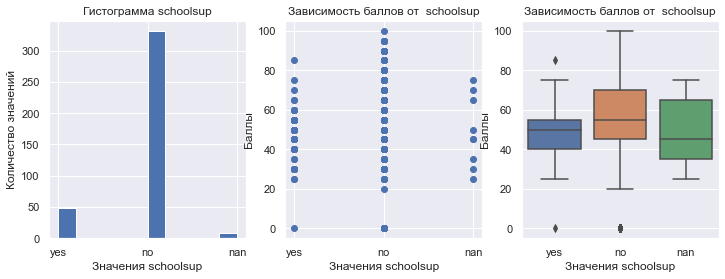

In [685]:
stud_math.schoolsup = stud_math.schoolsup.astype(str)
graf_cat('schoolsup')

Дополнительную образовательную поддержку школы получают лишь 13% учеников и она не влияет на результаты экзамена 

# famsup — семейная образовательная поддержка (yes или no)

In [686]:
categorian_view('famsup')

Количество незаполненных строк: 38
Количество уникальных значений: 2
count     351
unique      2
top       yes
freq      216
Name: famsup, dtype: object
Распределение признака в %
       famsup
yes  0.615385
no   0.384615
Среднее занчение баллов по наблюдениям 
famsup
no     52.074074
yes    51.712963
Name: score, dtype: float64


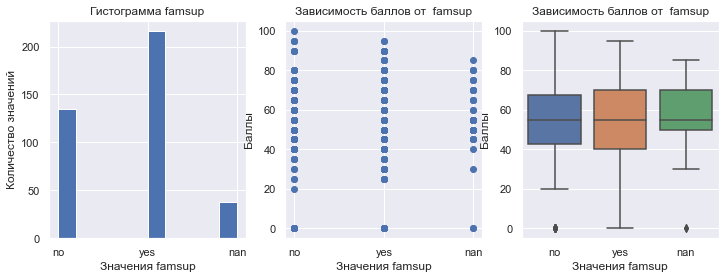

In [687]:
stud_math.famsup = stud_math.famsup.astype(str)
graf_cat('famsup')

Семейную образовтальную поддержку получают значительно болше учеников 62%, но на результаты оценок она не влияет 

# Оставшиеся номинативные показатели сгруппируем для анализа

Посмотрим есть ли в оставшихся столбцах ошибки

In [688]:
# причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 
# 'course' - образовательная программа, 'other' - другое)

replace_mode('reason')
stud_math['reason'].unique()

array(['course', 'other', 'home', 'reputation'], dtype=object)

In [689]:
# опекун ('mother' - мать, 'father' - отец, 'other' - другое)

replace_mode('guardian')
stud_math['guardian'].unique()

array(['mother', 'father', 'other'], dtype=object)

In [690]:
# время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

replace_mode('traveltime')
stud_math['traveltime'].unique()

array(['2.0', '1.0', '3.0', '4.0'], dtype=object)

In [691]:
# время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

replace_mode('studytime')
stud_math['studytime'].unique()

array(['2.0', '3.0', '1.0', '4.0'], dtype=object)

In [692]:
# количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

replace_mode('failures')
stud_math['failures'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [693]:
# дополнительные внеучебные занятия (yes или no)

replace_mode('activities')
stud_math['activities'].unique()

array(['no', 'yes'], dtype=object)

In [694]:
# посещал детский сад (yes или no)

replace_mode('nursery')
stud_math['nursery'].unique()

array(['yes', 'no'], dtype=object)

In [695]:
# хочет получить высшее образование (yes или no)

replace_mode('higher')
stud_math['higher'].unique()

array(['yes', 'no'], dtype=object)

In [696]:
# наличие интернета дома (yes или no)

replace_mode('internet')
stud_math['internet'].unique()

array(['yes', 'no'], dtype=object)

In [697]:
# в романтических отношениях (yes или no)

replace_mode('romantic')
stud_math['romantic'].unique()

array(['no', 'yes'], dtype=object)

In [698]:
# семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

replace_mode('famrel')
stud_math['famrel'].unique() # ОШИБКА 

array(['4.0', '5.0', '3.0', '-1.0', '2.0', '1.0'], dtype=object)

В данных колонки famrel присутвует ошибочное значение   -1, нужно заменить его на предполагаемое 1

In [579]:
stud_math.loc[stud_math['famrel'] == -1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,nan,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


In [580]:
# заменим ошибочное значение 

stud_math.loc[stud_math['famrel'] == -1].replace(-1, 1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,nan,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,1.0,2.0,2.0,5.0,14.0,40.0


In [699]:
# проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

replace_mode('goout')
stud_math['goout'].unique()

array(['4.0', '3.0', '2.0', '1.0', '5.0'], dtype=object)

In [700]:
# текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

replace_mode('health')
stud_math['health'].unique()

array(['3.0', '5.0', '1.0', '2.0', '4.0'], dtype=object)

### Посмотрим различаются ли распределения баллов (score) в зависимости от значения этих переменных

In [701]:
# Функция для визуализации зависисмоти номинативных значений от баллов

def get_boxplot(col):
    # stud_math[col] = stud_math[col].astype(str)
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=col, y='score', data=stud_math, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + col)
    plt.show()

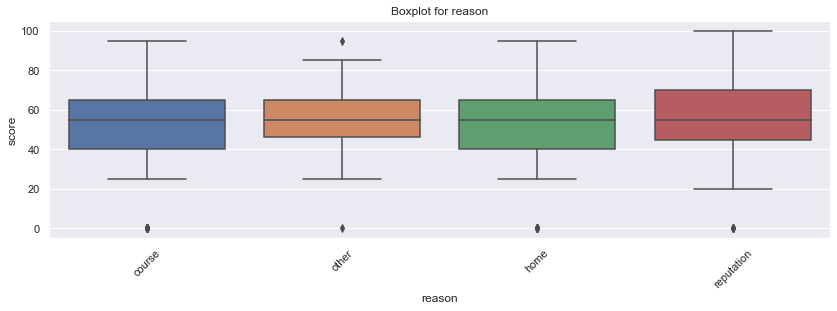

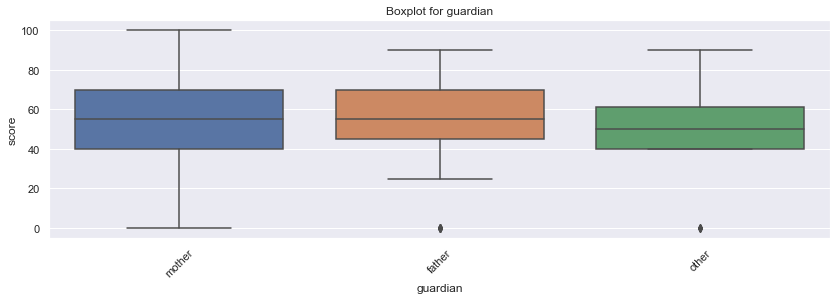

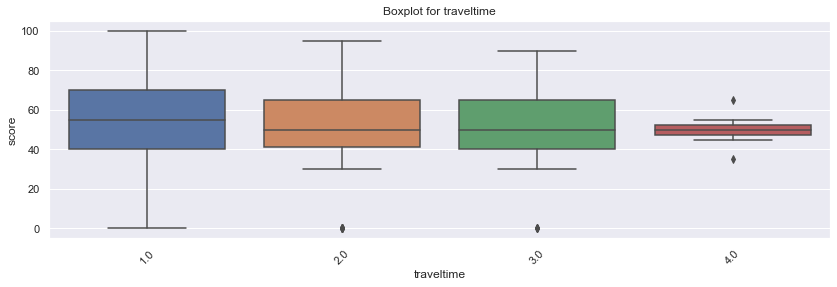

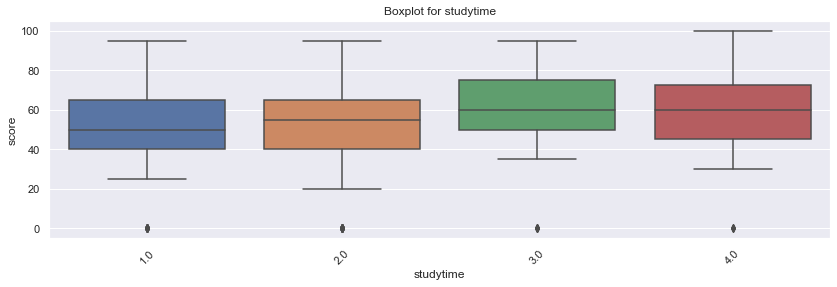

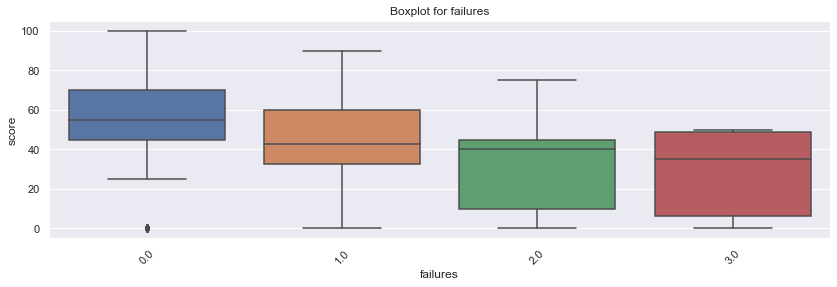

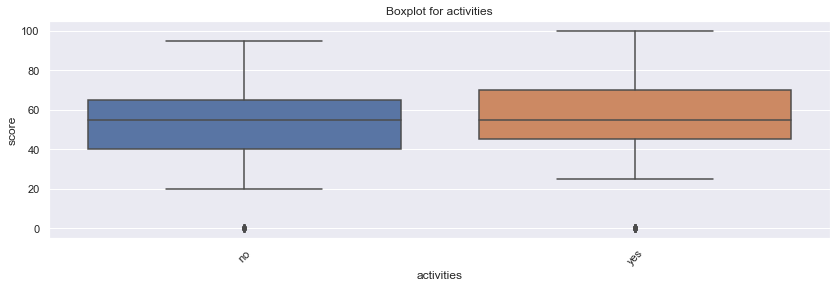

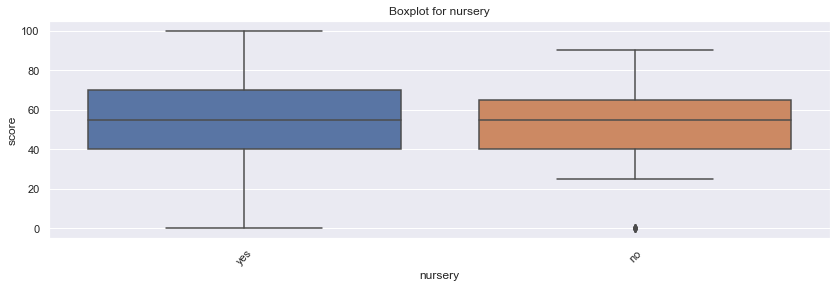

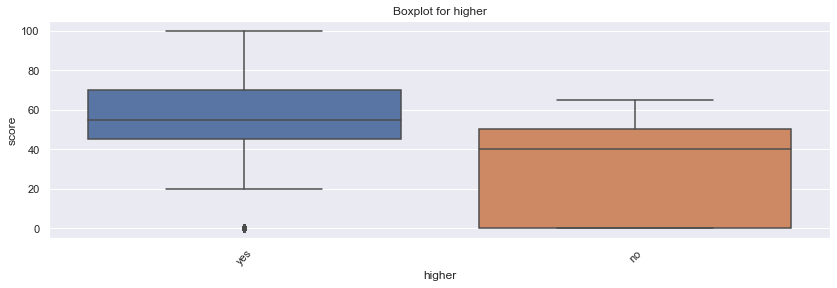

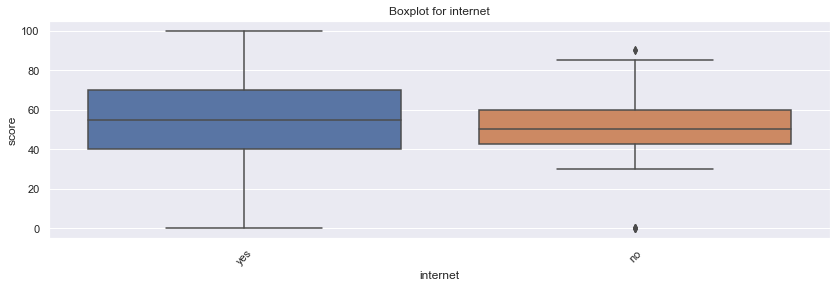

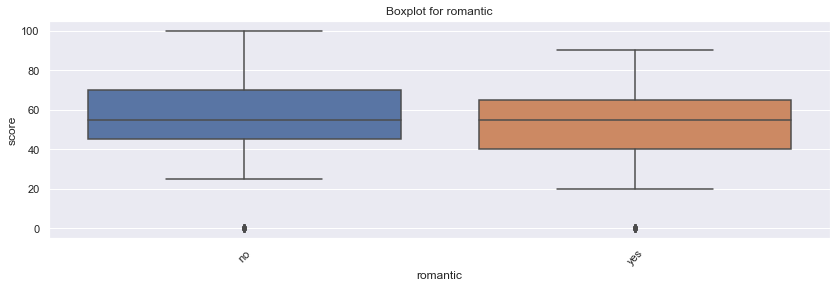

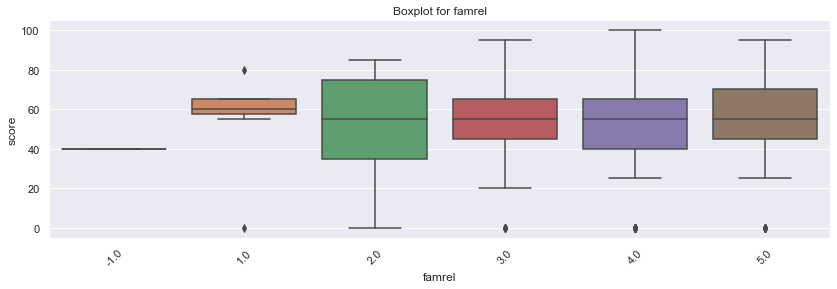

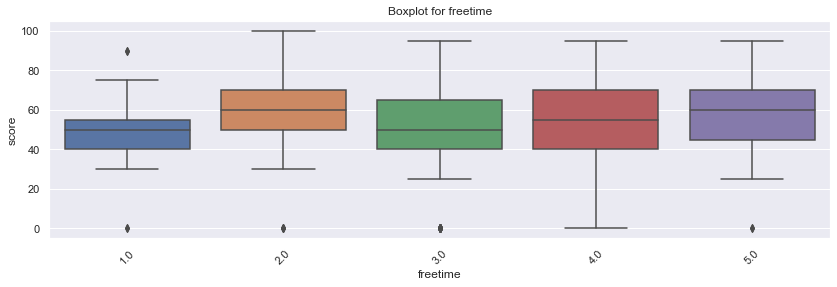

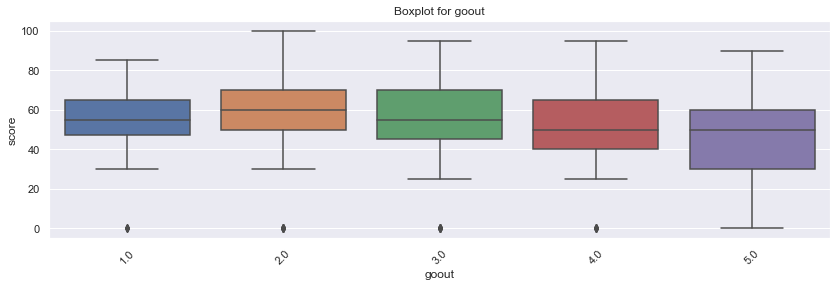

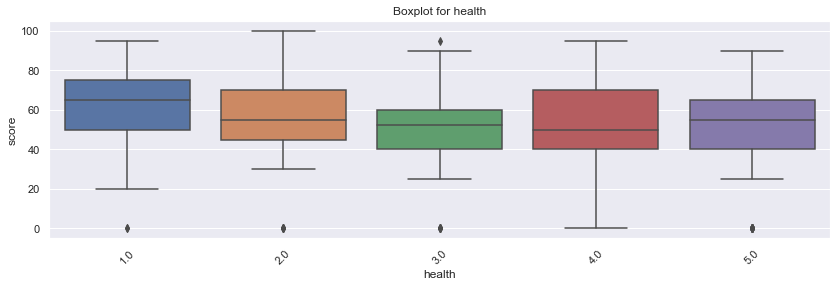

In [702]:
for col in ['reason', 'guardian', 'traveltime', 'studytime', 'failures', 'activities', 'nursery', 'higher', 'internet',
           'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Влияют на оценку по математике: studytime, failures, higher, freetime, goout, health 

Можно сказать что:
- чем больше ученик тратит времени на учебу по мимо школы, тем выше его баллы по математике; 
- что с ростом количества внеучебных неудач снижаются баллы по экзамену;
- что ученики, которые хотят получить высшее образование сдали экзамен значительно лучше, чем те, которые не хотят;
- возможно, что ученики у которых больше свободного времени, в целом набрали больше баллов, но зависмость не очевидна;
- ученики, которые больше времени проводят с друзьями, набрали меньше баллов на экзамене 

Не влияют на оценку по математике: reason, guardian, traveltime, activities, nursery, internet, romantic, famrel

Посмотрим ближе на наблюдения, которые влияют на количество баллов 

# studytime

In [703]:
categorian_view('studytime')

Количество незаполненных строк: 0
Количество уникальных значений: 4
count     389
unique      4
top       2.0
freq      196
Name: studytime, dtype: object
Распределение признака в %
     studytime
2.0   0.503856
1.0   0.264781
3.0   0.161954
4.0   0.069409
Среднее занчение баллов по наблюдениям 
studytime
1.0    49.466019
2.0    51.403061
3.0    57.777778
4.0    56.296296
Name: score, dtype: float64


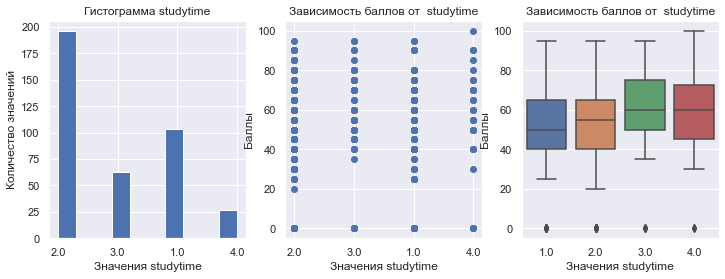

In [704]:
graf_cat('studytime')

Большинство учеников тратит на учебу вне школы 2-2.5 часа. Среднее значение набранных баллов по математике растет с ростом потраченного времени на учебу дома. Также максмальный балл набрали ученики, которые тратили на учебу дома более 10 часов.

# failures

In [705]:
categorian_view('failures')

Количество незаполненных строк: 0
Количество уникальных значений: 4
count     389
unique      4
top       0.0
freq      312
Name: failures, dtype: object
Распределение признака в %
     failures
0.0  0.802057
1.0  0.123393
2.0  0.038560
3.0  0.035990
Среднее занчение баллов по наблюдениям 
failures
0.0    56.121795
1.0    40.000000
2.0    32.333333
3.0    29.642857
Name: score, dtype: float64


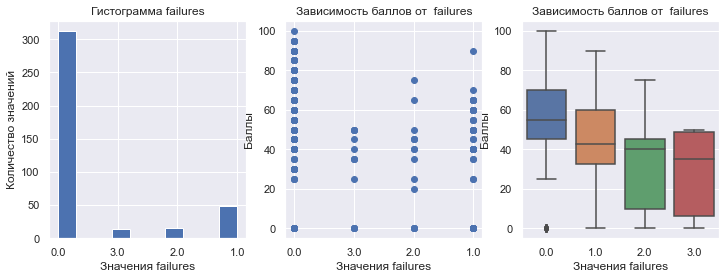

In [706]:
graf_cat('failures')

79% учеников не имели внеучебных неудач. С ростом количества внеучебных неудач среднее значение набранных баллов по математике значительно снижается 

# higher

In [707]:
categorian_view('higher')

Количество незаполненных строк: 0
Количество уникальных значений: 2
count     389
unique      2
top       yes
freq      370
Name: higher, dtype: object
Распределение признака в %
       higher
yes  0.951157
no   0.048843
Среднее занчение баллов по наблюдениям 
higher
no     33.684211
yes    53.216216
Name: score, dtype: float64


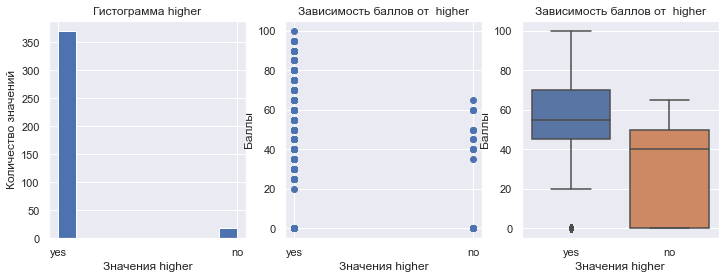

In [708]:
stud_math.higher = stud_math.higher.astype(str)
graf_cat('higher')

Большинство учеников хотя получить высшее образование - 95%. Кажется, что оставшиеся пять процентов сдали экзамен хуже, их средний балл 33%. Среди этих пяти процентов учеников не было высохих оценок за экзамен.  

# freetime, goout

In [709]:
categorian_view('freetime')

Количество незаполненных строк: 9
Количество уникальных значений: 5
count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64
Распределение признака в %
     freetime
3.0  0.400000
4.0  0.289474
2.0  0.165789
5.0  0.097368
1.0  0.047368
Среднее занчение баллов по наблюдениям 
freetime
1.0    48.333333
2.0    57.539683
3.0    48.947368
4.0    52.636364
5.0    56.351351
Name: score, dtype: float64


C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


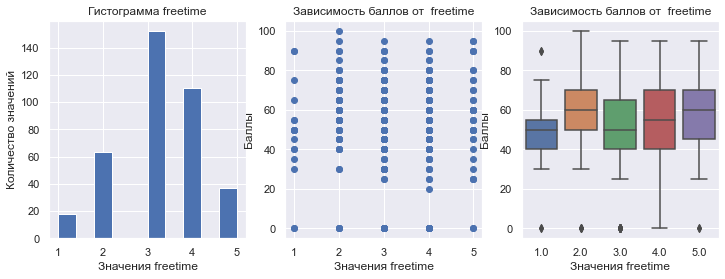

In [710]:
graf_cat('freetime')

Большинство учеников имеют среднее количество свободного времени. Восзможно, что оценка слишком субьективна: мало и много. Большинство указали средний вариант ответа. Влияние на набранный балл по экзамену неочевидно.

In [711]:
categorian_view('goout')

Количество незаполненных строк: 0
Количество уникальных значений: 5
count     389
unique      5
top       3.0
freq      133
Name: goout, dtype: object
Распределение признака в %
        goout
3.0  0.341902
2.0  0.259640
4.0  0.208226
5.0  0.131105
1.0  0.059126
Среднее занчение баллов по наблюдениям 
goout
1.0    49.347826
2.0    55.990099
3.0    54.586466
4.0    49.506173
5.0    44.509804
Name: score, dtype: float64


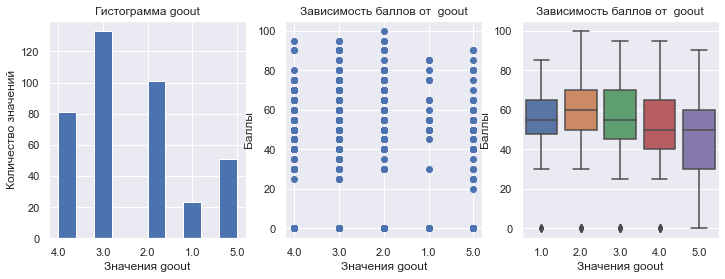

In [712]:
graf_cat('goout')

Аналогично, большинство учеников отметили средний вариант ответа, на вопрос о времени с друзьями. Скорее всего это слишком субьективно и не влияет на набранные баллы за экзамен.

# health

In [713]:
categorian_view('health')

Количество незаполненных строк: 0
Количество уникальных значений: 5
count     389
unique      5
top       5.0
freq      152
Name: health, dtype: object
Распределение признака в %
       health
5.0  0.390746
3.0  0.226221
4.0  0.154242
1.0  0.120823
2.0  0.107969
Среднее занчение баллов по наблюдениям 
health
1.0    59.361702
2.0    52.619048
3.0    50.625000
4.0    50.833333
5.0    51.480263
Name: score, dtype: float64


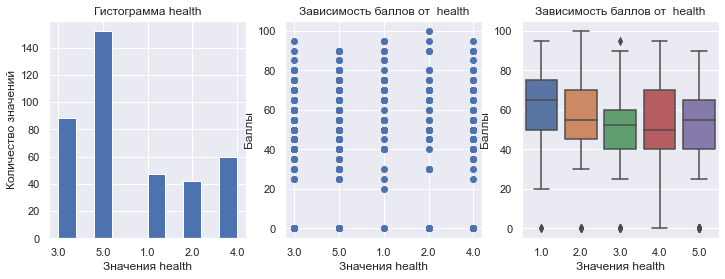

In [714]:
graf_cat('health')

Большинство учеников по их субьективной оценке здоровы. Данные о здоровье учеников не влияют в целом на баллы за экзамен.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения набранных баллов за экзамен по различным параметрам неразличимы:

In [715]:
# Функция проверяет статистически значимые различия колонок

def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [720]:
for col in binary_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [719]:
for col in categorial_columns:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures


In [728]:
stud_math.corr()['score'].sort_values()

failures     -0.344338
age          -0.155726
goout        -0.129685
traveltime   -0.070559
health       -0.070460
freetime      0.019026
famrel        0.057112
absences      0.065283
Fedu          0.078573
studytime     0.115741
Medu          0.213349
score         1.000000
Name: score, dtype: float64

В результате EDA для анализа влияния параметров условий школьников на результаты баллов, полученных по математике были получены следующие выводы:
- В данных двовльно много незаполнееных значений, только колонки age, sex и school были заполнены полностью;
- Выбросы найдены только в столбце absences. В Fedu и famrel найдены несущстенные ошибки,  что позволяет сделать вывод о том, что данные достаточно чистые;
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это age, absences, address, studytime, schoolsup, paid, higher, romanic, Medu, Mjob, failures, freetime, goout.